# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys_weather import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [44]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [45]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Setting Units
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        # Log url, record, set numbers
        print(f"Found Record {i} | {city}")

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Found Record 0 | iqaluit
Processing Record 2 of Set 1 | shakawe
Found Record 1 | shakawe
Processing Record 3 of Set 1 | kainantu
Found Record 2 | kainantu
Processing Record 4 of Set 1 | taltal
Found Record 3 | taltal
Processing Record 5 of Set 1 | kristiansund
Found Record 4 | kristiansund
Processing Record 6 of Set 1 | bethel
Found Record 5 | bethel
Processing Record 7 of Set 1 | west island
Found Record 6 | west island
Processing Record 8 of Set 1 | yellowknife
Found Record 7 | yellowknife
Processing Record 9 of Set 1 | port-aux-francais
Found Record 8 | port-aux-francais
Processing Record 10 of Set 1 | waitangi
Found Record 9 | waitangi
Processing Record 11 of Set 1 | hemsby
Found Record 10 | hemsby
Processing Record 12 of Set 1 | verkhneyarkeyevo
Found Record 11 | verkhneyarkeyevo
Processing Record 13 of Set 1 | grytviken
Found Record 12 | grytviken
Processing Record 14 of Set 1 | ben

In [48]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [49]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-3.50,68,18,4.92,CA,1697487018
1,shakawe,-18.3667,21.8500,25.70,14,1,1.92,BW,1697487283
2,kainantu,-6.2887,145.8655,15.08,94,97,1.18,PG,1697487283
3,taltal,-25.4000,-70.4833,19.10,64,25,2.79,CL,1697487283
4,kristiansund,63.1115,7.7320,8.36,87,75,2.57,NO,1697487283


In [50]:
# Export the City_Data into a csv
# Had weird issues with directory, created one instead to find a solution after struggling with it 
import os

output_directory = "Desktop/python-api-challenge/mod_6/output_data"

os.makedirs(output_directory, exist_ok=True)

city_data_df.to_csv(os.path.join(output_directory, "cities.csv"), index_label="City_ID")


In [51]:
# Read saved data
csv_file_path = "Desktop/python-api-challenge/mod_6/output_data/cities.csv"
city_data_df = pd.read_csv(csv_file_path, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-3.50,68,18,4.92,CA,1697487018
1,shakawe,-18.3667,21.8500,25.70,14,1,1.92,BW,1697487283
2,kainantu,-6.2887,145.8655,15.08,94,97,1.18,PG,1697487283
3,taltal,-25.4000,-70.4833,19.10,64,25,2.79,CL,1697487283
4,kristiansund,63.1115,7.7320,8.36,87,75,2.57,NO,1697487283


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

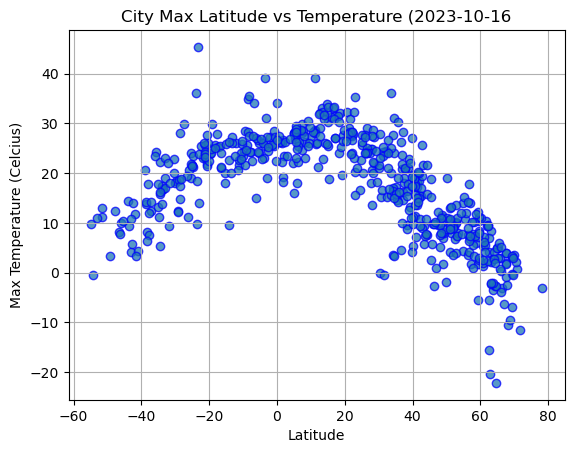

In [58]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="blue", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2023-10-16")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celcius)")
plt.grid(True)

# Save the figure
plt.savefig("Desktop/python-api-challenge/mod_6/output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

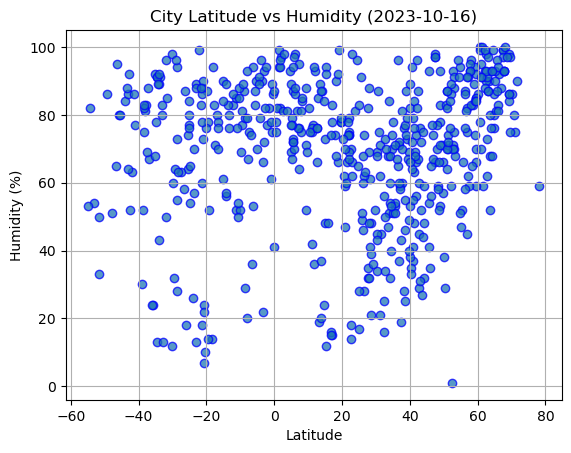

In [59]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2023-10-16)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Desktop/python-api-challenge/mod_6/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

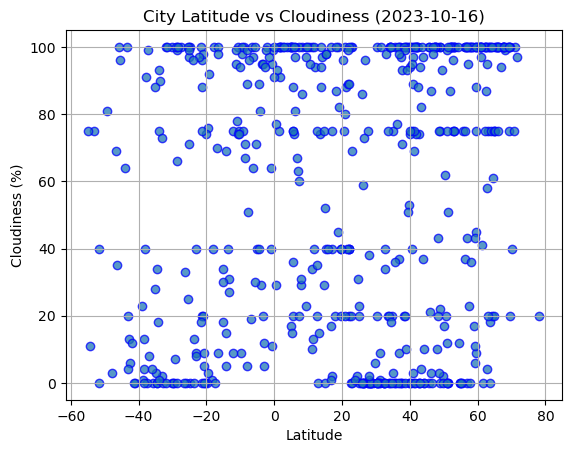

In [60]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2023-10-16)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Desktop/python-api-challenge/mod_6/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

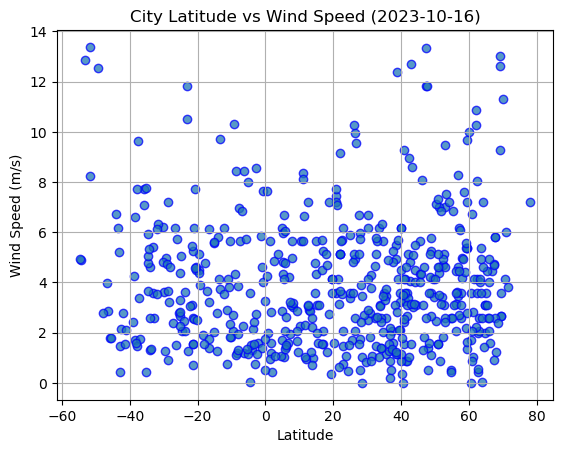

In [61]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2023-10-16)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("Desktop/python-api-challenge/mod_6/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-3.50,68,18,4.92,CA,1697487018
4,kristiansund,63.1115,7.7320,8.36,87,75,2.57,NO,1697487283
5,bethel,41.3712,-73.4140,17.20,63,69,0.89,US,1697487009
7,yellowknife,62.4560,-114.3525,6.90,98,100,4.12,CA,1697487181
10,hemsby,52.6971,1.6918,10.21,93,100,5.15,GB,1697487284


In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,shakawe,-18.3667,21.8500,25.70,14,1,1.92,BW,1697487283
2,kainantu,-6.2887,145.8655,15.08,94,97,1.18,PG,1697487283
3,taltal,-25.4000,-70.4833,19.10,64,25,2.79,CL,1697487283
6,west island,-12.1568,96.8225,25.99,83,75,6.17,CC,1697487283
8,port-aux-francais,-49.3500,70.2167,3.26,86,81,12.53,TF,1697487283


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.843706338822051


Text(0, 0.5, 'Max Temperature')

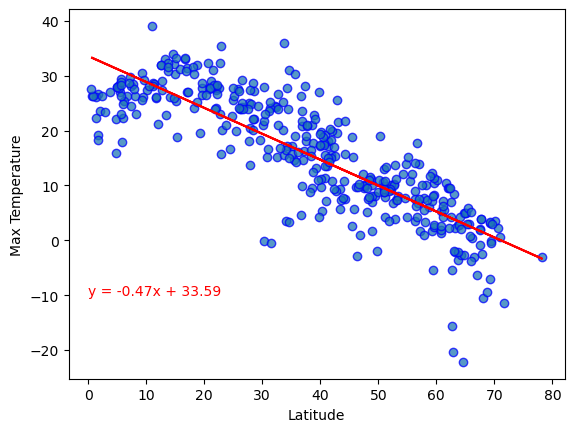

In [81]:
# Linear regression on Northern Hemisphere, define first
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

# Calculating 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

print(f'The r-value is {rvalue}')

plt.annotate(line_eq,(0,-10),fontsize=10,color="red")

# Plotting
plt.scatter(x_values, y_values, marker="o", edgecolors="blue", alpha=0.75, label="Cities")
plt.plot(x_values, regress_values, "r-", label=f'Regression Line: {line_eq}')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")


The r-value is 0.7368184447273529


Text(-15, 5, 'y = 0.39x + 29.45')

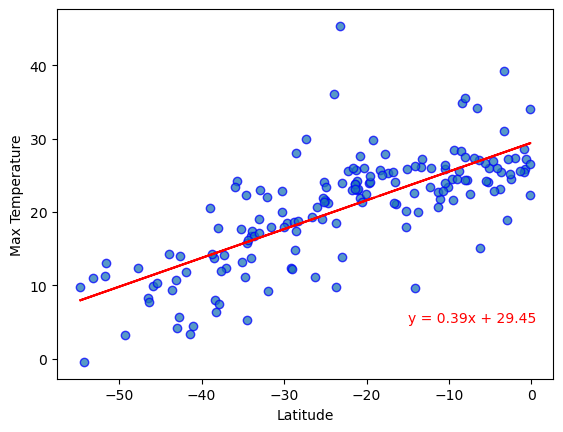

In [92]:
# Linear regression on Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

# Calculating 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

print(f'The r-value is {rvalue}')

# Plotting
plt.scatter(x_values, y_values, marker="o", edgecolors="blue", alpha=0.75, label="Cities")
plt.plot(x_values, regress_values, "r-", label=f'Regression Line: {line_eq}')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.annotate(line_eq,(-15,5),fontsize=10,color="red")


Discussion about the linear relationship: 
Based upon the data shown above, it can be inferred that there is direct relationship between an increase in temperature and a closer proximity to the Equator.
In short, the closer someone is to the equator or 0 latitude, the hotter it will be.


In [113]:
### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.18321086964812355


Text(0, 0.5, 'Humidity')

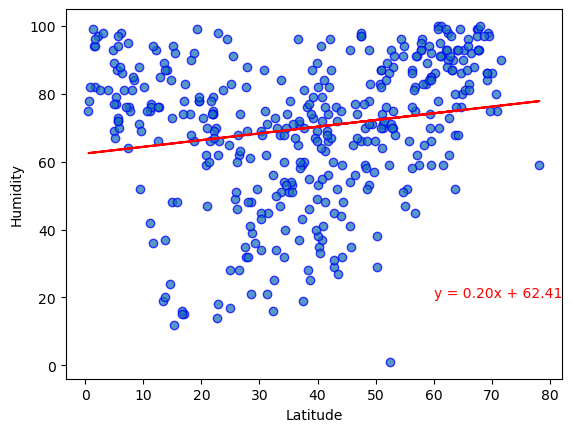

In [103]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

# Calculating 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

print(f'The r-value is {rvalue}')

plt.annotate(line_eq,(60,20),fontsize=10,color="red")

# Plotting
plt.scatter(x_values, y_values, marker="o", edgecolors="blue", alpha=0.75, label="Cities")
plt.plot(x_values, regress_values, "r-", label=f'Regression Line: {line_eq}')
plt.xlabel("Latitude")
plt.ylabel("Humidity")

The r-value is 0.09417557062136793


Text(0, 0.5, 'Humidity')

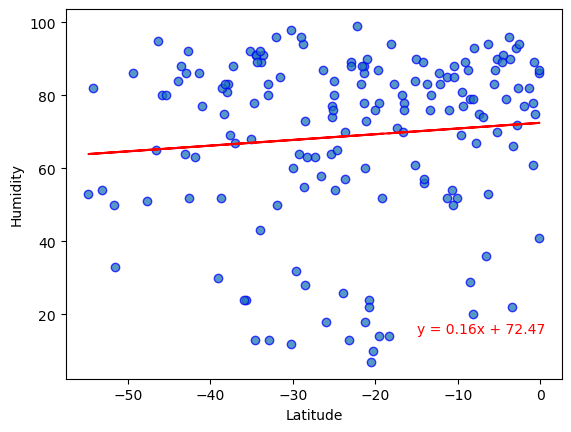

In [109]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

# Calculating 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

print(f'The r-value is {rvalue}')

plt.annotate(line_eq,(-15,15),fontsize=10,color="red")

# Plotting
plt.scatter(x_values, y_values, marker="o", edgecolors="blue", alpha=0.75, label="Cities")
plt.plot(x_values, regress_values, "r-", label=f'Regression Line: {line_eq}')
plt.xlabel("Latitude")
plt.ylabel("Humidity")

Discussion about the linear relationship: 
The data does not show a strong relationship between humidity and latitude. But, there many be a small relationship betweem being closer to the equator with 0 latitude and more humidity.    

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.11092190418898314


Text(0, 0.5, 'Cloudiness')

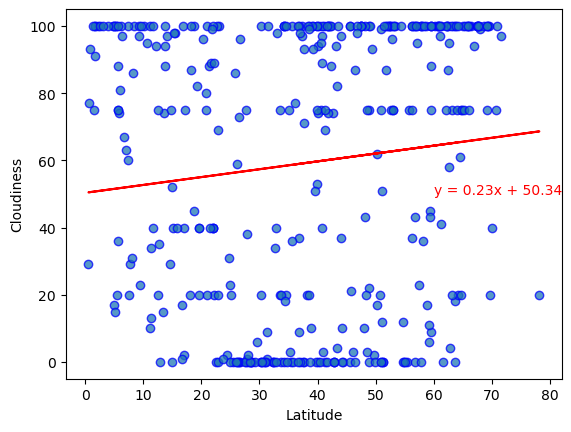

In [121]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

# Calculating 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

print(f'The r-value is {rvalue}')

plt.annotate(line_eq,(60,50),fontsize=10,color="red")

# Plotting
plt.scatter(x_values, y_values, marker="o", edgecolors="blue", alpha=0.75, label="Cities")
plt.plot(x_values, regress_values, "r-", label=f'Regression Line: {line_eq}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

The r-value is 0.2701070556350504


Text(0, 0.5, 'Cloudiness')

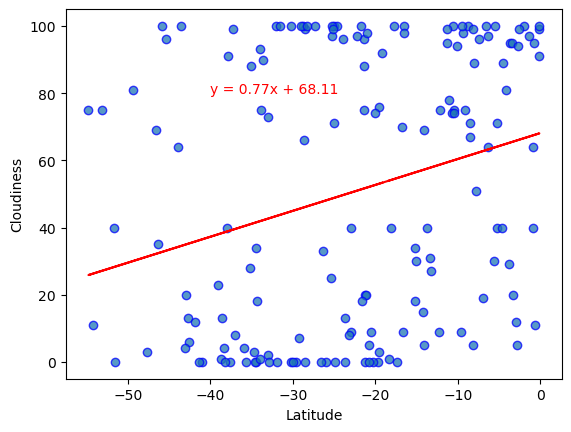

In [132]:
# Southern Hemisphere

x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

# Calculating 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

print(f'The r-value is {rvalue}')

plt.annotate(line_eq,(-40,80),fontsize=10,color="red")

# Plotting
plt.scatter(x_values, y_values, marker="o", edgecolors="blue", alpha=0.75, label="Cities")
plt.plot(x_values, regress_values, "r-", label=f'Regression Line: {line_eq}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


Discussion about the linear relationship: Based upon the data above, cloudiness and latitude does not have a relationship on one another. 


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.1298789453555326


Text(0, 0.5, 'Wind Speed')

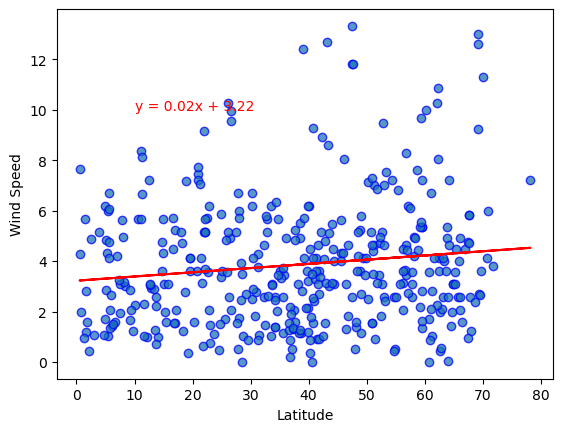

In [152]:
# Northern Hemisphere

x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

# Calculating 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

print(f'The r-value is {rvalue}')

plt.annotate(line_eq,(10,10),fontsize=10,color="red")

# Plotting
plt.scatter(x_values, y_values, marker="o", edgecolors="blue", alpha=0.75, label="Cities")
plt.plot(x_values, regress_values, "r-", label=f'Regression Line: {line_eq}')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


The r-value is -0.20237762614187313


Text(0, 0.5, 'Wind Speed')

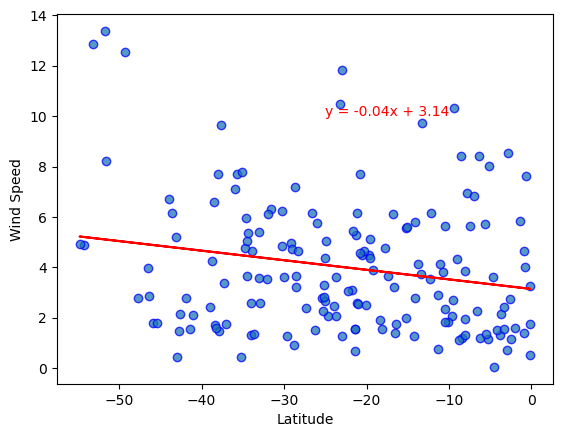

In [148]:
# Southern Hemisphere

x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

# Calculating 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

print(f'The r-value is {rvalue}')

plt.annotate(line_eq,(-25,10),fontsize=10,color="red")

# Plotting
plt.scatter(x_values, y_values, marker="o", edgecolors="blue", alpha=0.75, label="Cities")
plt.plot(x_values, regress_values, "r-", label=f'Regression Line: {line_eq}')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


Discussion about the linear relationship: While the relationship between latitude and windspeed seems to be minimal, it can be seen that high windspeeds can occur more frequently at latitudes farther away from the equator. 